# 9. Model Inference

## 9.1 Import Libraries

In [24]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile
import os


In [ ]:
drive.mount('/content/drive')

## 9.2 load model

In [15]:
# Load trained model
model = load_model('/content/drive/MyDrive/MyModel/best_model.h5')

In [16]:
# Function to perform prediction
def predict_image(img_path):
    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Perform prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)  # Get the class with the highest probability

    return predicted_class, prediction

In [19]:
with zipfile.ZipFile('/generated_data.zip', 'r') as zip_ref:
    zip_ref.extractall('generated_data')


In [35]:
# Specify the image path of the newly generated road sign
img_dir = '/content/generated_data'

In [36]:
image_files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]


In [37]:
class_names = ['trafficlight', 'stop', 'speedlimit', 'crosswalk']  # Adjust based on your classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


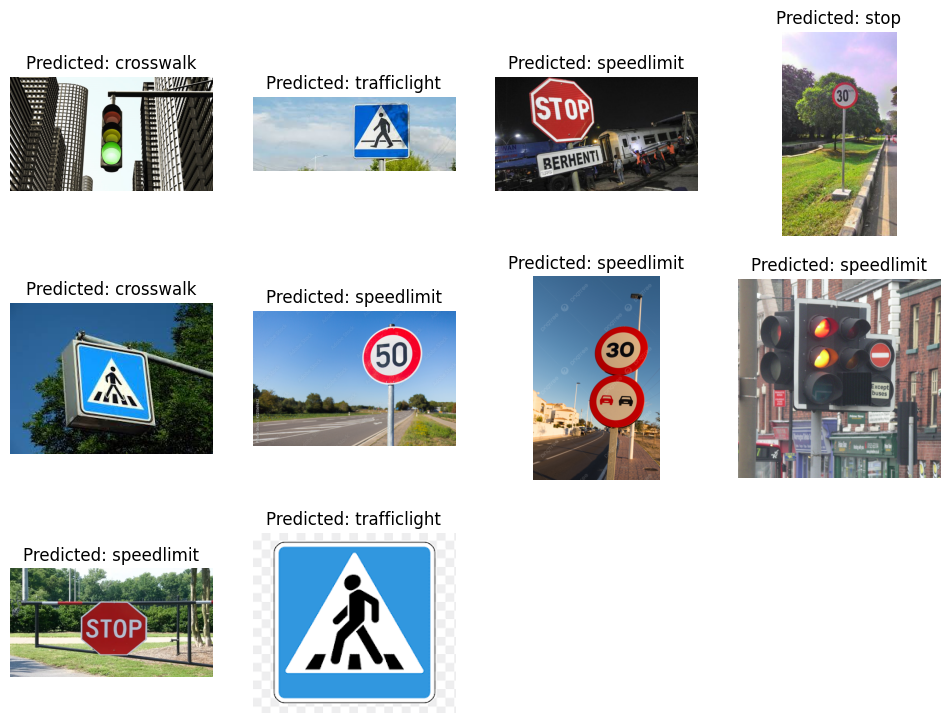

In [38]:
# Plot settings
num_images = len(image_files)
cols = 4  # Number of columns in the grid
rows = (num_images // cols) + (num_images % cols > 0)  # Calculate the number of rows needed

# Create the figure for the grid
plt.figure(figsize=(12, rows * 3))

# Iterate over each image in the directory and plot
for i, img_file in enumerate(image_files):
    img_path = os.path.join(img_dir, img_file)

    # Perform inference
    predicted_class, prediction_probs = predict_image(img_path)

    # Display the image along with the predicted class
    img = image.load_img(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f'Predicted: {class_names[predicted_class[0]]}')
    plt.axis('off')


#### dari hasil tersebut didapatkan bahwa model berhasil memprediksi 3 dari 10 gambar baru